In [1]:
#import the libraries
!pip install XGBoost
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from sklearn import model_selection
from xgboost import XGBRegressor


In [2]:
#Read train and test data

In [3]:
train=pd.read_csv('train.csv')
train.shape


(4209, 378)

In [4]:
test=pd.read_csv('test.csv')
test.shape
test
test["X0"].nunique()

49

In [5]:
train.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [6]:
train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


### Check for null and unique values for train data

In [8]:
#check the null values of training data
null_values=train.isna().sum().any()
if(null_values!=0):
    print('missing value is present')
else:
    print('missing value is not present')

missing value is not present


In [9]:
#check unique values of training data
for column in train:
    print(column,':',train[column].unique())

ID : [   0    6    7 ... 8412 8415 8417]
y : [130.81  88.53  76.26 ...  85.71 108.77  87.48]
X0 : ['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
X1 : ['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
X2 : ['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
X3 : ['a' 'e' 'c' 'f' 'd' 'b' 'g']
X4 : ['d' 'b' 'c' 'a']
X5 : ['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
X6 : ['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']
X8 : ['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 'm' 'k' 'd' 'i' 'v' 'j' 'b' 'q' 'w' 'g'
 'y' 'l' 'f' 'u' 'r' 't' 'c']
X10 : [0 1]

In [10]:
# check whether output is normally distributed

(array([ 71.,  69.,  27., 178., 831., 543., 387., 372., 361., 545., 359.,
        191., 104.,  49.,  41.,  20.,  20.,  14.,   5.,   5.,   5.,   5.,
          3.,   0.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 72.11  ,  75.9742,  79.8384,  83.7026,  87.5668,  91.431 ,
         95.2952,  99.1594, 103.0236, 106.8878, 110.752 , 114.6162,
        118.4804, 122.3446, 126.2088, 130.073 , 133.9372, 137.8014,
        141.6656, 145.5298, 149.394 , 153.2582, 157.1224, 160.9866,
        164.8508, 168.715 , 172.5792, 176.4434, 180.3076, 184.1718,
        188.036 , 191.9002, 195.7644, 199.6286, 203.4928, 207.357 ,
        211.2212, 215.0854, 218.9496, 222.8138, 226.678 , 230.5422,
        234.4064, 238.2706, 242.1348, 245.999 , 249.8632, 253.7274,
        257.5916, 261.4558, 265.32  ]),
 <BarContainer object of 50 artists>)

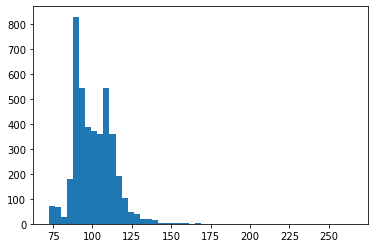

In [11]:
import matplotlib.pyplot as plt
plt.hist(train['y'],bins=50)

<AxesSubplot:>

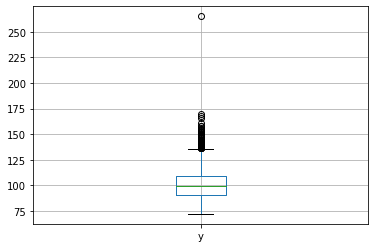

In [12]:
train.boxplot('y')

(array([  9.,  27.,  35.,  28.,  26.,  13.,  12.,   8.,   8.,  16.,  46.,
         93., 208., 291., 299., 231., 188., 158., 103., 115., 140., 152.,
        141., 102.,  77., 104., 144., 151., 209., 177., 158., 124.,  98.,
         95.,  66.,  55.,  49.,  37.,  27.,  30.,  12.,  12.,  16.,  10.,
         23.,   5.,   6.,   9.,   9.,   7.]),
 array([ 72.11  ,  73.3784,  74.6468,  75.9152,  77.1836,  78.452 ,
         79.7204,  80.9888,  82.2572,  83.5256,  84.794 ,  86.0624,
         87.3308,  88.5992,  89.8676,  91.136 ,  92.4044,  93.6728,
         94.9412,  96.2096,  97.478 ,  98.7464, 100.0148, 101.2832,
        102.5516, 103.82  , 105.0884, 106.3568, 107.6252, 108.8936,
        110.162 , 111.4304, 112.6988, 113.9672, 115.2356, 116.504 ,
        117.7724, 119.0408, 120.3092, 121.5776, 122.846 , 124.1144,
        125.3828, 126.6512, 127.9196, 129.188 , 130.4564, 131.7248,
        132.9932, 134.2616, 135.53  ]),
 <BarContainer object of 50 artists>)

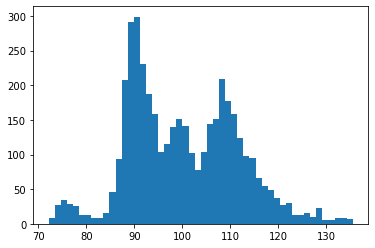

In [13]:
filtered= train['y']<136
train=train[filtered]
plt.hist(train['y'],bins=50)

(4159, 378)

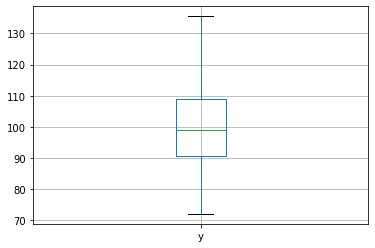

In [14]:
train.boxplot('y')
train.shape

In [15]:
target=train['y']
target

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4159, dtype: float64

In [16]:
target.shape

(4159,)

In [17]:
train=train.drop('y',axis=1)
train.shape

(4159, 377)

In [18]:
train.dtypes

ID       int64
X0      object
X1      object
X2      object
X3      object
         ...  
X380     int64
X382     int64
X383     int64
X384     int64
X385     int64
Length: 377, dtype: object

In [19]:
train_binary=train.iloc[:,9:]
train_binary

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4207,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
train_binary.dtypes

X10     int64
X11     int64
X12     int64
X13     int64
X14     int64
        ...  
X380    int64
X382    int64
X383    int64
X384    int64
X385    int64
Length: 368, dtype: object

### variance calculation of training data

In [21]:
# calculating variance of binary data in training set
var_train=train_binary.var()

In [22]:
var_train

X10     0.013287
X11     0.000000
X12     0.068998
X13     0.054602
X14     0.244838
          ...   
X380    0.008110
X382    0.007637
X383    0.001201
X384    0.000481
X385    0.001441
Length: 368, dtype: float64

In [23]:
zero_variance=var_train[var_train==0]


In [24]:

constant_columns=zero_variance.index
constant_columns

Index(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X339', 'X347'],
      dtype='object')

In [25]:
len('zero_variance')

13

In [26]:
# Drop columns having zero variance

In [27]:
train_binary.drop(constant_columns,axis=1,inplace=True)


In [28]:
train_binary

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4207,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# calculating variance of catagorical data in training set

In [30]:
train_catagorical=train.iloc[:,:9]
train_catagorical.drop('ID',axis=1,inplace=True)

In [31]:
train_catagorical

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


### Apply label encoder

In [32]:
le = LabelEncoder()

In [33]:
for column in train_catagorical:
    train_catagorical[column] =le.fit_transform(train_catagorical[column])
train_catagorical


,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,16,0,3,24,9,14
1,32,21,18,4,3,28,11,14
2,20,24,33,2,3,27,9,23
3,20,21,33,5,3,27,11,4
4,20,23,33,5,3,12,3,13
...,...,...,...,...,...,...,...,...
4204,8,20,15,2,3,0,3,16
4205,31,16,39,3,3,0,7,7
4206,8,23,37,0,3,0,6,4
4207,9,19,24,5,3,0,11,20


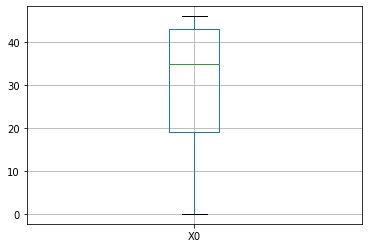

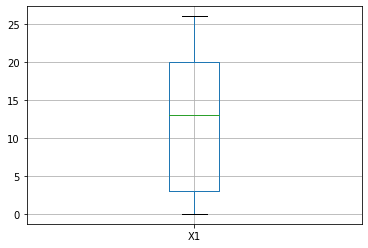

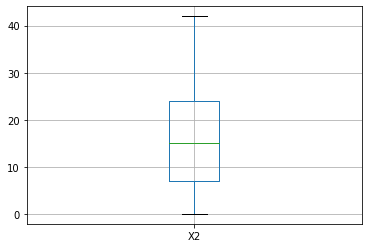

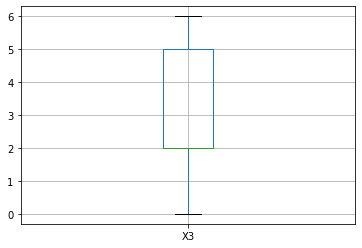

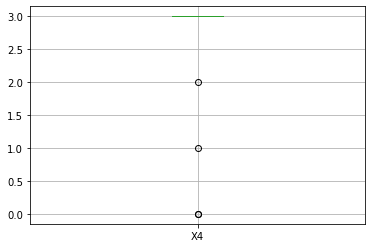

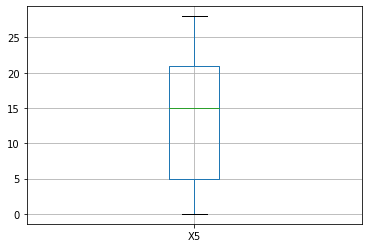

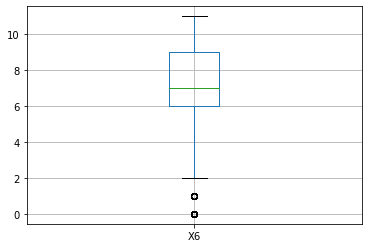

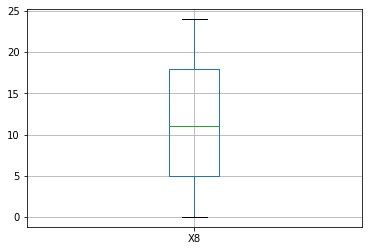

In [34]:
for column in train_catagorical:
        plt.figure()
        train_catagorical.boxplot([column])

In [35]:
#x4 has low variance so drop that column
train_catagorical.drop(['X4'],axis=1,inplace=True)

In [36]:
train_catagorical

,X0,X1,X2,X3,X5,X6,X8
0,32,23,16,0,24,9,14
1,32,21,18,4,28,11,14
2,20,24,33,2,27,9,23
3,20,21,33,5,27,11,4
4,20,23,33,5,12,3,13
...,...,...,...,...,...,...,...
4204,8,20,15,2,0,3,16
4205,31,16,39,3,0,7,7
4206,8,23,37,0,0,6,4
4207,9,19,24,5,0,11,20


In [37]:
#Final training data after removing variances having zero values
train_data=pd.concat([train_catagorical,train_binary,],axis=1)
train_data

,X0,X1,X2,X3,X5,X6,X8,X10,X12,X13,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,16,0,24,9,14,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,32,21,18,4,28,11,14,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,33,2,27,9,23,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,33,5,27,11,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,33,5,12,3,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8,20,15,2,0,3,16,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,31,16,39,3,0,7,7,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,8,23,37,0,0,6,4,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4207,9,19,24,5,0,11,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
train_data

,X0,X1,X2,X3,X5,X6,X8,X10,X12,X13,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,16,0,24,9,14,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,32,21,18,4,28,11,14,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,33,2,27,9,23,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,33,5,27,11,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,33,5,12,3,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8,20,15,2,0,3,16,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,31,16,39,3,0,7,7,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,8,23,37,0,0,6,4,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4207,9,19,24,5,0,11,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#Apply standard scalar for scaling the data
from sklearn.preprocessing import StandardScaler

In [40]:
scaler=StandardScaler()

In [41]:
scaled_train=scaler.fit_transform(train_data)
scaled_train


array([[ 0.16263963,  1.39206609, -0.02661349, ..., -0.03469379,
        -0.02193436, -0.03800972],
       [ 0.16263963,  1.15787781,  0.15740228, ..., -0.03469379,
        -0.02193436, -0.03800972],
       [-0.71317164,  1.50916024,  1.53752054, ..., -0.03469379,
        -0.02193436, -0.03800972],
       ...,
       [-1.58898291,  1.39206609,  1.90555208, ..., -0.03469379,
        -0.02193436, -0.03800972],
       [-1.51599864,  0.92368952,  0.70944959, ..., -0.03469379,
        -0.02193436, -0.03800972],
       [ 1.18441945,  0.92368952, -1.31472386, ..., -0.03469379,
        -0.02193436, -0.03800972]])

In [42]:
scaled_train.shape

(4159, 362)

### Perform dimensionality reduction using PCA

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.95)
train_transformed =pca.fit_transform(scaled_train)

pd.DataFrame(train_transformed)


,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,146
0,12.357958,-3.125525,-0.831557,2.040717,-1.664423,-3.400427,9.007276,-3.767052,-16.049393,10.110005,...,0.011647,-0.326447,-0.282834,-0.118123,-0.352722,0.093692,-0.180524,0.006530,-0.173875,-0.020801
1,-0.102802,0.365019,0.993185,1.077344,-2.640108,-0.000435,1.017941,-0.627766,-0.476093,0.307900,...,1.216058,1.396498,0.031626,-0.530543,2.034044,-0.404528,-0.995872,2.025885,3.197077,-0.366137
2,10.579794,20.899222,-4.949914,-4.509415,0.938471,2.474031,1.143366,3.651328,-0.816172,1.358639,...,0.997063,-12.021894,-6.804840,-1.473388,-1.493501,-0.418300,4.651628,0.301040,1.336729,-0.051176
3,7.660065,21.179389,-5.926070,0.302676,1.959431,0.730831,0.441106,-0.091743,0.354226,3.069214,...,-0.295516,1.753672,0.511688,0.879267,-0.072184,0.176224,-0.148600,0.299960,-0.314905,-0.746525
4,6.887384,21.259046,-6.474617,1.042272,1.948033,0.004486,-0.978185,-0.294847,1.041742,0.856575,...,2.269446,-13.205514,-8.040838,-0.332047,-2.049707,-0.021066,8.131804,1.494791,2.778629,-1.064488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4154,-0.252179,0.190872,4.161746,-4.047899,-0.955934,0.118566,1.737985,2.888422,0.589557,-0.403214,...,-0.932389,0.901034,1.296354,0.179338,0.325937,0.412465,-0.236082,0.014067,-0.626799,-0.275893
4155,12.145796,-3.020821,-0.643517,12.781968,5.615568,-17.324649,12.114064,4.803015,20.351090,-4.725177,...,-0.374285,-0.069368,-0.062864,0.016568,-1.057676,0.337263,0.047870,0.657281,0.349193,0.160753
4156,0.425020,0.910837,3.423287,-4.689536,-0.532848,-0.400117,4.337021,-3.436826,0.101911,2.731055,...,0.084424,0.492496,0.169674,-0.163648,0.043750,-0.144437,0.557118,-0.054003,0.021886,-0.277996
4157,-1.323264,0.581471,-0.086533,5.628168,-0.353375,-0.244880,-4.004449,-0.334564,-0.812993,1.507929,...,0.690730,0.137303,0.474017,0.538882,-1.091675,-0.845363,-0.233196,-0.798220,0.248962,-0.736024


In [44]:
#splitting training and testing data
import sklearn.model_selection as ms
x_train,x_test,Y_train,Y_test=ms.train_test_split(train_transformed,target,test_size=0.3, random_state=12345)


In [45]:
x_train.shape,x_test.shape,Y_train.shape,Y_test.shape

((2911, 147), (1248, 147), (2911,), (1248,))

### Predict the test_df values using XGBoost


In [46]:
### Building model using the train data set
seed=7
num_trees=100
model=XGBRegressor(n_estimators=num_trees,random_state=seed)
results=model_selection.cross_val_score(model,x_train,Y_train,cv=5)
print(results.mean())

0.4962730889687973


In [47]:
#accuracy is very less so we need to do hyper parameter turning to get the best parameters

In [48]:
from sklearn.model_selection import RandomizedSearchCV
model=XGBRegressor(n_jobs=-1,random_state=42)
parameters={'eta':[.01,0.1,0.2],'max_depth':[1,2,3,4,5,6],'gamma':[0.1,0.01,0.5,1],'colsample_bytree':[0.2,0.3,0.5,1],'subsample':[0.1,0.2,0.3,0.5,0.8,1],'learning_rate':[0.001,0.01,0.05,.1,1],'n_estimators':[50,100,150,200,500],'reg_alpha':[1e-5,1e-3,1e-1,1,1e1]}
random=RandomizedSearchCV(model,parameters,cv=5,n_jobs=-1,verbose=10)
random.fit(x_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          predictor=None, random_state=42,
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.2, 0.3, 0.5, 1],
                                        'eta': [0.01, 0.1, 0.2],
                                        'gamma': [0.1, 0.01, 0.5, 1],
                                        'learning_rate': [0.001, 0.01, 0.05,
                                                          0.1, 1],
                                        'max_depth': [1, 2, 3, 4, 5, 6],
                                        'n_estimators': [50, 100, 150, 200,
                                                         500],
                                        'reg_alpha': [1e-05, 0.001, 0.1, 1,
                                                      10.0],
                                        'subsample': [0.1, 0.2, 0.3, 0.5, 0.8,
                                                      1]},
                   verbose=10)

In [49]:
random.best_params_

{'subsample': 0.2,
 'reg_alpha': 1,
 'n_estimators': 500,
 'max_depth': 2,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'eta': 0.2,
 'colsample_bytree': 0.5}

In [55]:
from sklearn import model_selection
from xgboost import XGBRegressor
regressor=XGBRegressor(subsample=0.5,reg_alpha= 1,n_estimators= 500,max_depth= 1,learning_rate= 0.1,gamma= 0.01,eta= 0.01,colsample_bytree= 1)
results=model_selection.cross_val_score(regressor,x_train,Y_train,cv=5)
results
print(results.mean())


0.569776063925955


In [54]:
#accuracy is improved after hyper parameter turning

In [52]:
regressor.fit(x_train,Y_train)
y_pred=regressor.predict(x_test)
import sklearn.metrics as mt
from sklearn.metrics import r2_score
print(sqrt(mt.mean_squared_error(Y_test,y_pred)))


7.41968717177277


In [272]:
r2_score_test=r2_score(Y_test,y_pred)
r2_score_test

0.5805741314249432


### Check for null and unique values for test data

In [273]:
#Read test data
test=pd.read_csv('test.csv')

In [274]:
test

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,...,0,0,1,0,0,0,0,0,0,0


In [275]:
test['X0'].nunique()

49

In [276]:
test.shape

(4209, 377)

In [277]:
test.columns

Index(['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=377)

In [278]:
test.describe()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4211.039202,0.019007,0.000238,0.074364,0.061060,0.427893,0.000713,0.002613,0.008791,0.010216,...,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,2423.078926,0.136565,0.015414,0.262394,0.239468,0.494832,0.026691,0.051061,0.093357,0.100570,...,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6310.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8416.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [279]:
#check the null values of testing data
null_values=test.isna().sum().any()
if(null_values!=0):
    print('missing value is present')
else:
    print('missing value is not present')

missing value is not present


In [280]:
#check the unique values of testing data
for column in test:
    print(column,':',test[column].unique())

ID : [   1    2    3 ... 8413 8414 8416]
X0 : ['az' 't' 'w' 'y' 'x' 'f' 'ap' 'o' 'ay' 'al' 'h' 'z' 'aj' 'd' 'v' 'ak'
 'ba' 'n' 'j' 's' 'af' 'ax' 'at' 'aq' 'av' 'm' 'k' 'a' 'e' 'ai' 'i' 'ag'
 'b' 'am' 'aw' 'as' 'r' 'ao' 'u' 'l' 'c' 'ad' 'au' 'bc' 'g' 'an' 'ae' 'p'
 'bb']
X1 : ['v' 'b' 'l' 's' 'aa' 'r' 'a' 'i' 'p' 'c' 'o' 'm' 'z' 'e' 'h' 'w' 'g' 'k'
 'y' 't' 'u' 'd' 'j' 'q' 'n' 'f' 'ab']
X2 : ['n' 'ai' 'as' 'ae' 's' 'b' 'e' 'ak' 'm' 'a' 'aq' 'ag' 'r' 'k' 'aj' 'ay'
 'ao' 'an' 'ac' 'af' 'ax' 'h' 'i' 'f' 'ap' 'p' 'au' 't' 'z' 'y' 'aw' 'd'
 'at' 'g' 'am' 'j' 'x' 'ab' 'w' 'q' 'ah' 'ad' 'al' 'av' 'u']
X3 : ['f' 'a' 'c' 'e' 'd' 'g' 'b']
X4 : ['d' 'b' 'a' 'c']
X5 : ['t' 'b' 'a' 'z' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac'
 'ad' 'ae' 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
X6 : ['a' 'g' 'j' 'l' 'i' 'd' 'f' 'h' 'c' 'k' 'e' 'b']
X8 : ['w' 'y' 'j' 'n' 'm' 's' 'a' 'v' 'r' 'o' 't' 'h' 'c' 'k' 'p' 'u' 'd' 'g'
 'b' 'q' 'e' 'l' 'f' 'i' 'x']
X10 : [0 1]
X11 : [0 1]
X12 : [0 1

In [281]:
test.dtypes

ID       int64
X0      object
X1      object
X2      object
X3      object
         ...  
X380     int64
X382     int64
X383     int64
X384     int64
X385     int64
Length: 377, dtype: object

In [282]:
test_binary=test.iloc[:,9:]
test_binary

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4206,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### variance calculation of testing data

In [283]:
# drop columns having zero variances in the testing data
test_binary.drop(constant_columns,axis=1,inplace=True)

In [284]:
test_binary

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4206,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [285]:
test_catagorical=test.iloc[:,:9]
test_catagorical.drop('ID',axis=1,inplace=True)

In [286]:
test_catagorical

,X0,X1,X2,X3,X4,X5,X6,X8
0,az,v,n,f,d,t,a,w
1,t,b,ai,a,d,b,g,y
2,az,v,as,f,d,a,j,j
3,az,l,n,f,d,z,l,n
4,w,s,as,c,d,y,i,m
...,...,...,...,...,...,...,...,...
4204,aj,h,as,f,d,aa,j,e
4205,t,aa,ai,d,d,aa,j,y
4206,y,v,as,f,d,aa,d,w
4207,ak,v,as,a,d,aa,c,q


In [287]:
le = LabelEncoder()

In [288]:
for column in test_catagorical:
    test_catagorical[column] =le.fit_transform(test_catagorical[column])
test_catagorical

,X0,X1,X2,X3,X4,X5,X6,X8
0,21,23,34,5,3,26,0,22
1,42,3,8,0,3,9,6,24
2,21,23,17,5,3,0,9,9
3,21,13,34,5,3,31,11,13
4,45,20,17,2,3,30,8,12
...,...,...,...,...,...,...,...,...
4204,6,9,17,5,3,1,9,4
4205,42,1,8,3,3,1,9,24
4206,47,23,17,5,3,1,3,22
4207,7,23,17,0,3,1,2,16


In [289]:
test_catagorical.drop('X4',axis=1,inplace=True)

In [290]:
#Final testing data after removing variances having zero values

In [291]:
test_data=pd.concat([test_catagorical,test_binary,],axis=1)


In [292]:
test_data.columns.unique()


Index(['X0', 'X1', 'X2', 'X3', 'X5', 'X6', 'X8', 'X10', 'X12', 'X13',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=362)

In [293]:
train_data.columns.unique()

Index(['X0', 'X1', 'X2', 'X3', 'X5', 'X6', 'X8', 'X10', 'X12', 'X13',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=362)

In [294]:
#Apply standard scalar for scaling the data
scaled_test=scaler.transform(test_data)
pd.DataFrame(scaled_test,columns=test_data.columns)

,X0,X1,X2,X3,X5,X6,X8,X10,X12,X13,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,-0.640187,1.392066,1.629528,1.189162,1.532748,-2.330750,1.478440,-0.116827,-0.283796,-0.248014,...,-0.683388,-0.245822,-0.676960,6.841389,-0.097293,-0.090788,-0.088056,-0.034694,-0.021934,-0.03801
1,0.892482,-0.949817,-0.762677,-1.679588,-0.526655,-0.274918,1.762648,-0.116827,-0.283796,-0.248014,...,-0.683388,-0.245822,1.477192,-0.146169,-0.097293,-0.090788,-0.088056,-0.034694,-0.021934,-0.03801
2,-0.640187,1.392066,0.065394,1.189162,-1.616926,0.752997,-0.368910,-0.116827,-0.283796,-0.248014,...,-0.683388,-0.245822,-0.676960,6.841389,-0.097293,-0.090788,-0.088056,-0.034694,-0.021934,-0.03801
3,-0.640187,0.221125,1.629528,1.189162,2.138454,1.438275,0.199506,-0.116827,-0.283796,-0.248014,...,-0.683388,-0.245822,-0.676960,6.841389,-0.097293,-0.090788,-0.088056,-0.034694,-0.021934,-0.03801
4,1.111435,1.040784,0.065394,-0.532088,2.017313,0.410359,0.057402,-0.116827,-0.283796,-0.248014,...,1.463297,-0.245822,-0.676960,-0.146169,-0.097293,-0.090788,-0.088056,-0.034694,-0.021934,-0.03801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,-1.734951,-0.247252,0.065394,1.189162,-1.495785,0.752997,-1.079429,-0.116827,-0.283796,-0.248014,...,-0.683388,-0.245822,-0.676960,-0.146169,-0.097293,-0.090788,-0.088056,-0.034694,-0.021934,-0.03801
4205,0.892482,-1.184005,-0.762677,0.041662,-1.495785,0.752997,1.762648,-0.116827,-0.283796,-0.248014,...,-0.683388,4.067988,-0.676960,-0.146169,-0.097293,-0.090788,-0.088056,-0.034694,-0.021934,-0.03801
4206,1.257404,1.392066,0.065394,1.189162,-1.495785,-1.302834,1.478440,-0.116827,-0.283796,-0.248014,...,-0.683388,-0.245822,-0.676960,-0.146169,-0.097293,-0.090788,-0.088056,-0.034694,-0.021934,-0.03801
4207,-1.661967,1.392066,0.065394,-1.679588,-1.495785,-1.645472,0.625817,-0.116827,-0.283796,4.032029,...,-0.683388,-0.245822,1.477192,-0.146169,-0.097293,-0.090788,-0.088056,-0.034694,-0.021934,-0.03801


### Perform dimensionality reduction.

In [295]:
test_transformed =pca.transform(scaled_test)
test_data=pd.DataFrame(test_transformed)
test_data

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,146
0,8.795566,19.451177,-6.096082,0.906172,1.065041,0.109769,0.168529,-1.048335,-3.451278,3.409952,...,0.978344,-1.191542,-0.979127,-0.571375,-0.756765,0.839754,-1.656586,0.603715,-0.087738,-0.455723
1,1.853311,-5.759135,-9.487194,-1.887721,-2.034942,5.129570,3.794687,4.273666,-3.287689,1.921141,...,0.258736,-1.953157,-1.090336,-1.188979,-1.474961,0.790553,-0.868519,0.608823,-0.980063,0.335990
2,6.339277,16.391168,-3.708456,-1.532579,1.700240,-0.631131,1.245318,3.486576,-4.523868,2.596762,...,1.854460,-0.579097,-1.102498,0.882597,-0.133839,-0.229767,-0.372066,1.309514,1.065494,-0.632832
3,6.912638,21.197717,-6.785653,1.035277,1.947270,0.221039,-0.827178,0.059700,0.871479,0.898293,...,0.978983,-13.301795,-8.687073,-1.500147,-2.528562,-0.355212,7.341907,1.239690,3.226813,-1.128932
4,-1.903755,0.498129,5.611444,-3.182183,-0.726600,-1.213922,0.793246,2.478112,0.345670,-1.507478,...,-0.994208,-0.667633,0.112834,-0.441589,0.178050,0.220113,-0.378032,-0.386613,0.278184,-1.531609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,-1.607859,1.345438,5.768991,-0.513081,-0.444716,-1.092023,-3.485609,0.552600,0.029861,-1.615157,...,-0.714050,0.067559,-0.343246,-0.154247,-0.349307,-0.651584,-0.255603,-0.623215,-0.312830,-0.822472
4205,0.187612,-2.021574,-4.001668,0.547287,-2.860382,1.021462,3.106890,3.551503,-2.520080,-0.958852,...,-0.688760,0.474769,-0.821832,0.741122,-1.382918,-0.111261,-0.401989,0.001853,1.132004,-0.044726
4206,-2.685223,0.671694,3.158054,2.633350,-0.093507,-1.200236,-4.094738,1.154773,-0.209573,-0.334854,...,0.398750,-0.336544,0.403855,0.200987,-0.109476,0.187305,0.902805,-0.446809,0.319441,0.171882
4207,-1.300458,0.282375,4.043404,-4.390591,0.415635,-0.953355,1.613121,0.634347,0.681470,-1.099434,...,-0.113131,0.172308,0.009987,-0.100757,0.673748,0.313510,0.613724,-0.520723,-0.463511,-0.170873


In [296]:
## predicting the test values
test_pred =regressor.predict(test_data)
test_pred

array([ 91.95164 , 109.83159 ,  98.9661  , ...,  95.67032 , 112.04009 ,
        94.673744], dtype=float32)

## 